# Tugas Besar 2 IF3170 Inteligensi Buatan 

Kelompok Budak McD :
    1. Renjira Naufhal Dhiaegana - 13516014
    2. M. Nurraihan Naufal - 13516017
    3. Yuly Haruka Berliana Gunawan - 13516031
    4. Raka Hadhyana - 13516099
    5. Naufal Putra Pamungkas - 13516110

## Reading data train

In [233]:
import pandas as pd

heartD = pd.read_csv('tubes2_HeartDisease_train.csv')
heartD_target = heartD['Column14']
heartD_data = heartD.loc[:, :'Column13']
heartD_feature_names = ['age', 'sex', 'chest-pain type', 'resting blod presure', 'serum cholestrol', 
                        'fasting blood sugar above 120 mg/dl', 'resting ECG', 'max heart rate achieved', 'exercise induced angina',
                       'ST depression induced', 'peak exercise ST segment', 'member of major vessel', 'thal']

heartD_target_names = ['absence', 'presence', 'presence', 'presence', 'presence']

#print (heartD_data)

In [234]:
heartD_data.replace('?', -1, inplace=True)

In [235]:
#print(heartD_data)

## Reading Data Test

In [236]:
testD = pd.read_csv('tubes2_HeartDisease_test.csv')
testD.replace('?',-1,inplace=True)

## Handle Missing Values

In [237]:
import numpy as np 
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=-1, strategy="most_frequent")
imp.fit(heartD_data.values)
heartD_data = imp.transform(heartD_data)

imp.fit(testD.values)
testD = imp.transform(testD)


## Confusion Matrix Function

In [238]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
#   print(cm)
#   plt.xkcd()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
        
def calculatePerformance(y_test, y_predict, title):
    print("Akurasi: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict)))
    print()
    print("Classification Report")
    print(metrics.classification_report(y_test, y_predict, target_names=iris.target_names))
    print()
    plt.figure()
    # print(metrics.confusion_matrix(y_test, y_predict, labels=[0,1,2]))
    plot_confusion_matrix(metrics.confusion_matrix(y_test, y_predict), classes=iris.target_names, 
                          title= title + ' Confusion Matrix')
    plt.show()

## Naive Bayes

In [239]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

print('Gaussian Naive Bayes:')
# fit a Naive Bayes model to the data
gnb = GaussianNB()
gnb_class = gnb.fit(heartD_data, heartD_target)
print(gnb_class)

# make predictions
expected = heartD_target
predicted = gnb_class.predict(testD)
# summarize the fit of the model

print('\n')
print('Hasil prediksi :')
print(predicted)

Gaussian Naive Bayes:
GaussianNB(priors=None, var_smoothing=1e-09)


Hasil prediksi :
[1 2 1 1 0 1 4 1 0 1 1 1 0 3 1 4 2 0 1 1 0 1 0 2 3 0 1 3 3 1 0 1 2 0 1 0 0
 1 0 0 1 0 2 1 1 1 1 2 1 1 1 0 2 2 1 1 1 4 1 0 1 0 1 4 0 0 1 0 0 1 1 0 1 1
 0 1 1 0 0 1 0 4 1 1 0 2 1 0 3 1 3 0 0 0 0 1 0 1 1 0 2 0 1 0 2 1 0 1 1 3 0
 0 2 0 0 4 0 3 0 1 2 1 0 1 1 0 2 3 2 2 0 1 3 2 3 3 0 1 0 1 0]


## Decision Tree ID3

[0 1 0 1 1 0 2 1 1 0 1 0 0 0 0 4 2 0 0 0 0 3 1 3 4 0 1 3 3 1 0 0 3 0 1 2 3
 0 0 0 1 0 0 1 2 3 1 2 3 3 2 1 1 1 1 1 1 2 1 1 0 0 3 2 0 0 3 0 0 0 3 0 2 1
 0 0 0 0 0 1 0 3 0 1 0 1 0 0 1 3 0 0 1 0 0 0 0 3 1 0 3 0 1 1 0 1 0 3 2 2 1
 1 0 0 0 4 0 0 1 0 1 2 0 3 3 0 1 3 0 1 0 1 3 2 1 4 1 0 1 0 0]


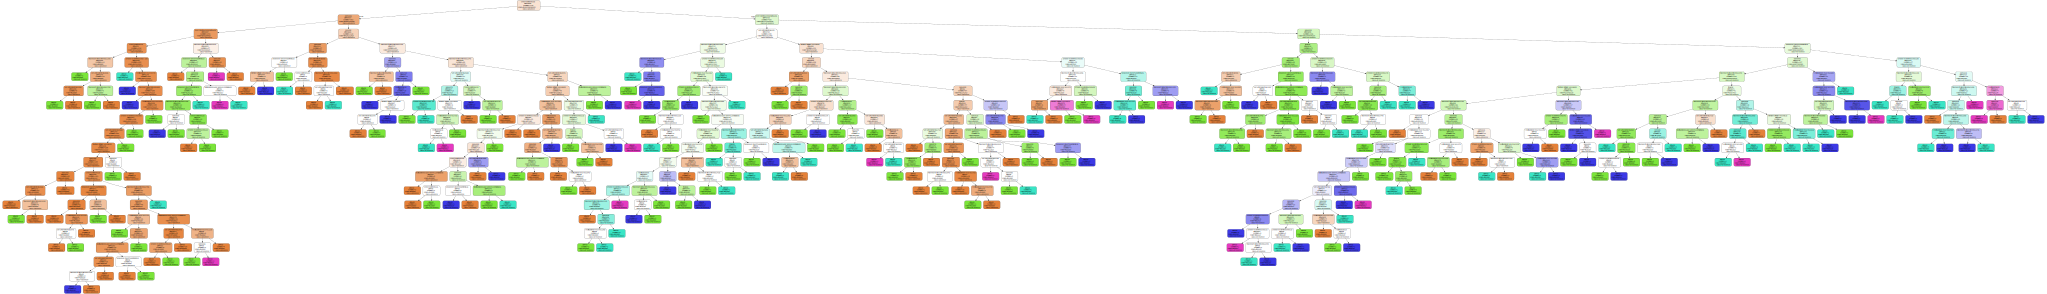

In [240]:
from sklearn import tree
import graphviz

DescTree = tree.DecisionTreeClassifier()
DescTree_class = DescTree.fit(heartD_data, heartD_target)
DescTree_predict = DescTree_class.predict(testD)
print (DescTree_predict)

dot_data = tree.export_graphviz(DescTree, out_file=None, 
                         feature_names=heartD_feature_names,  
                         class_names=heartD_target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## K-NN

In [241]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

kneighbors = KNeighborsClassifier(n_neighbors = 1)
kneighbors_class = kneighbors.fit(heartD_data, heartD_target)
kneighbors_predict = kneighbors_class.predict(testD)
print (kneighbors_predict)

# cm_kn = confusion_matrix(testD, kneighbors_predict)
# plt.figure()
# plot_confusion_matrix(cm_kn, classes = heartD_target_names, title='Confusion Matrix')

[0 0 0 0 1 0 3 0 0 1 2 3 1 0 1 1 2 0 1 0 1 1 0 1 3 2 1 3 1 2 1 3 1 1 3 2 1
 0 1 0 1 0 0 2 0 2 0 3 1 3 1 1 1 1 1 0 0 0 0 0 0 0 3 1 0 0 1 0 0 0 1 3 1 2
 1 0 1 0 0 2 0 1 0 1 1 1 2 0 1 2 1 2 0 1 0 0 0 0 1 1 3 0 1 0 1 1 0 2 1 0 0
 0 2 1 0 0 0 3 0 2 1 1 1 0 3 1 0 1 0 1 0 0 3 0 3 4 0 0 1 1 1]


## MLP

In [242]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)
mlp_class = mlp.fit(heartD_data, heartD_target)
mlp_predict = mlp_class.predict(testD)

print ("Prediksi : \n")
print (mlp_predict)
print ("\n")

Prediksi : 

[0 0 1 0 1 0 3 1 0 0 0 1 0 0 1 1 1 0 0 0 3 1 0 1 1 1 0 1 0 0 0 2 2 0 1 0 0
 0 0 0 0 0 0 1 1 0 1 2 1 2 1 0 0 1 0 0 0 0 0 0 2 0 2 3 0 2 1 0 0 0 2 0 0 1
 0 0 2 0 0 0 0 3 0 2 0 0 2 0 1 3 1 1 0 3 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 3 0 1 0 0 0 1 3 0 0 1 0 2 0 0 3 1 1 1 0 0 0 0 0]




## Performance

In [262]:
from sklearn.model_selection import KFold, train_test_split

def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
#   print(cm)
#   plt.xkcd()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
        

def calculate_datasplit_performance(data, target, method):
    data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.1)
    method.fit(data_train, target_train)
    
    predict = method.predict(data_test)
    print("Akurasi: {0:.4f}\n".format(metrics.accuracy_score(target_test, predict)))
    print("Classification Report")
    print(metrics.classification_report(target_test, predict, target_names=heartD_target_names))
    print()
    plt.figure()
    plot_confusion_matrix(metrics.confusion_matrix(target_test, predict), classes=heartD_target_names, 
                          title= 'Confusion Matrix')
    plt.show()

def calculate_10fold_performance(data, target, method):
    KF = KFold(10, shuffle=True)

    i = 1;
    sum_acc = 0
    sum_prec = 0
    sum_rec = 0
    
    for trainidx, testidx in KF.split(data):
        data_train, data_test = data[trainidx], data[testidx]
    
        target_train, target_test = target[trainidx], target[testidx]
        method.fit(data_train, target_train)

        accuration = metrics.accuracy_score(target_test, method.predict(data_test))
        precision = metrics.precision_score(target_test, method.predict(data_test), average="macro")
        recall = metrics.recall_score(target_test, method.predict(data_test), average="macro")

        #print("Set ", i)
        #print("Accuration: {0:.4f}".format(accuration))
        #print("Precision: {0:.4f}".format(precision))
        #print("Recall: {0:.4f}".format(recall))
        #print()
        i+=1
        sum_acc += accuration
        sum_prec += precision
        sum_rec += recall

    print("Average Accuration : {0:.4f}".format(sum_acc/10))
    print("Average Precision : {0:.4f}".format(sum_prec/10))
    print("Average Recall : {0:.4f}".format(sum_rec/10))


Akurasi: 0.4744

Classification Report
              precision    recall  f1-score   support

     absence       0.67      0.83      0.74        29
    presence       0.42      0.50      0.45        20
    presence       0.14      0.07      0.09        15
    presence       0.29      0.18      0.22        11
    presence       0.00      0.00      0.00         3

   micro avg       0.47      0.47      0.47        78
   macro avg       0.30      0.32      0.30        78
weighted avg       0.42      0.47      0.44        78




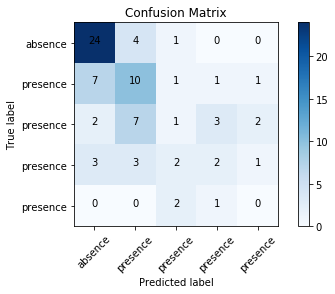

In [263]:
# CONTOH PEMAKAIAN 1
calculate_datasplit_performance(heartD_data, heartD_target, gnb)

In [277]:
# CONTOH PEMAKAIAN 10FOLD
calculate_10fold_performance(heartD_data, heartD_target, gnb)

Average Accuration : 0.5418
Average Precision : 0.3223
Average Recall : 0.3355


/home/naufal/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/naufal/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/naufal/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
